In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("Statistics")
Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter2\Project.toml`
  [13f3f980] CairoMakie v0.12.3
  [31c24e10] Distributions v0.25.109
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0


In [2]:
# # Translated from Matlab to Julia

# using Random, Statistics, CairoMakie, Distributions

# Random.seed!(1234)

# se = sqrt(exp(1))

# M = 10^4
# reps = [10^2, 10^3, 10^4]
# hitFreq = zeros(length(reps))

# for (count, rep) in enumerate(reps)
#     hit = 0
#     for i in 1:rep
#         x = exp.(randn(M)) / se
#         s_mean = mean(x)
#         s_std = std(x)
#         eBar = 1.96 * s_std / sqrt(M)
#         cLower = s_mean - eBar
#         cUpper = s_mean + eBar
#         if cLower <= 1 && 1 <= cUpper
#             hit += 1
#         end
#     end
#     hitFreq[count] = hit / rep
# end

In [5]:
using Random, Statistics, CairoMakie


function p2_1(sampleSize::Int)
    return exp.(randn(sampleSize)) / sqrt(exp(1))
end

function TakingSample(
    sampleSizes::Vector{Int},
    seed::Int = 1234,
)

    Random.seed!(seed)

    sampleMeans = zeros(length(sampleSizes))
    CIs = zeros(length(sampleSizes), 2)

    for (count, sampleSize) in enumerate(sampleSizes)
        sample = p2_1(sampleSize)
        sampleMean = mean(sample)
        sampleStd = std(sample)

        errorBar = 1.96 * sampleStd / sqrt(sampleSize)
        CI_Lower = sampleMean - errorBar
        CI_Upper = sampleMean + errorBar

        sampleMeans[count] = sampleMean
        CIs[count, 1] = CI_Lower
        CIs[count, 2] = CI_Upper
    end

    return sampleMeans, CIs
end

function PlotCI(
    expRange::AbstractArray{Int},
    fig::Figure = Figure(resolution = (600, 400)),
)
    
    sampleSizes = 10 .^ expRange
    sampleMeans, CIs = TakingSample(sampleSizes)

    ax = Axis(
        fig[1, 1],
        xlabel = "Sample Size", ylabel = "Sample Mean",
        limits = ((expRange[1] - 1, expRange[end] + 1), (0.8, 1.3)),
        xticks = (expRange, ["10^$i" for i in expRange]),
    )

    lines!(ax, [expRange[1] - 1, expRange[end] + 1], [1, 1], color = :red)

    scatter!(
        ax,
        expRange,
        sampleMeans,
        color = :blue,
        marker = :xcross,
        markersize = 15,
    )

    for i in 1:size(CIs, 1)
        lines!(
            ax,
            [expRange[i], expRange[i]],
            [CIs[i, 1], CIs[i, 2]],
            color = :yellow,
            linewidth = 3,
        )
    end

    return fig
end

PlotCI (generic function with 2 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\qMluh\src\scenes.jl:227


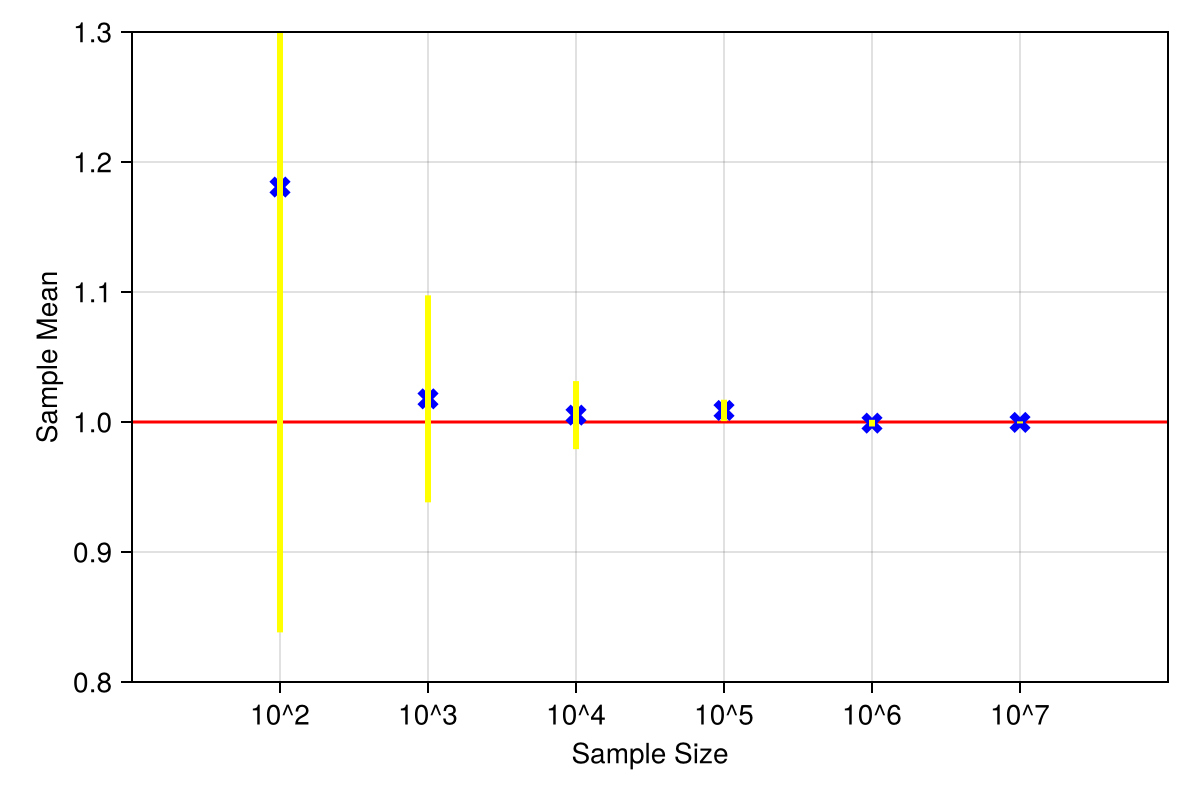

In [6]:
expRange = 2:7
fig = PlotCI(expRange)